In [1]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf  # For tf.data
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.applications import EfficientNetB0

# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
BATCH_SIZE = 64

C:\Users\aravi\anaconda3\envs\TF_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
import logging
import tensorflow as tf

# Suppress TensorFlow logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
dataset_name = "cifar10"
(ds_train, ds_test), ds_info = tfds.load(dataset_name, split=["train", "test"], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|                                             | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Size...:   0%|                                                | 0/162 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:01, ? file/s]
Dl Size...:   1%|▏                                       | 1/162 [00:04<11:14,  4.19s/ MiB]

Extraction completed...: 0 file [00:04, ? file/s]
Dl Size...:   1%|▍                                       | 2/162 [00:05<06:38,  2.49s/ MiB]

Extraction completed...: 0 file [00:05, ? file/s]
Dl Size...:   2%|▋                                       | 3/162 [00:06<04:52,  1.84s/ MiB]

Extraction completed...: 0 file [00:06, ? file/s]
Dl Size...:   2%|▉                                       | 4/162 [00:07<03:44,  1.42s/ MiB]

Extraction completed...: 0 file [00:07, ? file/s]
Dl Size...:   3%|█▏                                      | 5/162 [00:08<03:05,  1

Dataset cifar10 downloaded and prepared to C:\Users\aravi\tensorflow_datasets\cifar10\3.0.2. Subsequent calls will reuse this data.


In [7]:
NUM_CLASSES = ds_info.features["label"].num_classes
NUM_CLASSES

10

In [8]:
size = (IMG_SIZE, IMG_SIZE)

ds_train = ds_train.map(lambda image, label: (tf.image.resize(image, size), label))
ds_test = ds_test.map(lambda image, label: (tf.image.resize(image, size), label))

In [12]:
type(ds_train)

tensorflow.python.data.ops.dataset_ops.MapDataset

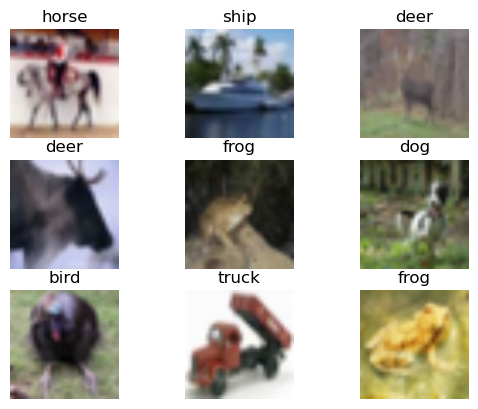

In [25]:
def format_label(label):
    string_label = label_info.int2str(label)
    # return string_label.split("-")[1]
    return string_label


label_info = ds_info.features["label"]

for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().astype("uint8"))
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

In [36]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]

def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

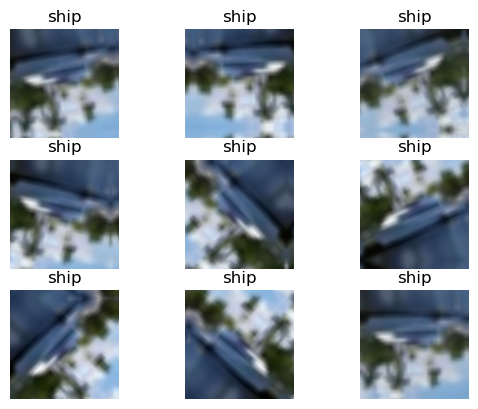

In [40]:
for image, label in ds_train.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = img_augmentation(np.expand_dims(image.numpy(), axis=0))
        aug_img = np.array(aug_img)
        plt.imshow(aug_img[0].astype("uint8"))
        plt.title("{}".format(format_label(label)))
        plt.axis("off")